In [16]:
#устанавливаем модуль Алиса 
#!pip install alice_ml 

In [ ]:
#устанавливаем MNE
#!pip install mne

In [1]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew , variation
from scipy.signal import welch
import pandas as pd
from scipy.signal import hilbert
import glob
from mne.event import define_target_events
from alice_ml.features import get_features_from_mne
from alice_ml.models import predict_mne


In [2]:
%matplotlib qt

In [3]:
import os

In [4]:
#прописываем путь к папке, в которой хранятся данные 
os.chdir('D:/all_eeg/mu_eeg/chernovik_2/resample/resample MU 3-4 eyars NL_2 (all)/') 

In [5]:
filenames = glob.glob('*_NL_2.fif')
print(len(filenames))
filenames

18


['NP022303_NL_2.fif',
 'NP042303_NL_2.fif',
 'NP042304_NL_2.fif',
 'NP042306_NL_2.fif',
 'NP042307_NL_2.fif',
 'NP042309_NL_2.fif',
 'NP042317_NL_2.fif',
 'NP042331_NL_2.fif',
 'NP052310_NL_2.fif',
 'NP052315_NL_2.fif',
 'NP062306_NL_2.fif',
 'NP112201_NL_2.fif',
 'NP112207_NL_2.fif',
 'NP112211_NL_2.fif',
 'NP112314_NL_2.fif',
 'NP112317_NL_2.fif',
 'NP112318_NL_2.fif',
 'NP122302_NL_2.fif']

In [6]:
ID=filenames[16]#выираем нужную запись  
ID

'NP112318_NL_2.fif'

In [1]:
#фракталы+сказка с фракталами 
name = ID #фракталы+сказка 

E = mne.io.read_raw_fif(name, preload = True)
E = E.drop_channels(['Photo', 'micr'])  
E = E.filter(1, 70, phase='zero-double')
E = E.copy().notch_filter(50, picks=None, filter_length='auto', 
                                notch_widths=None, trans_bandwidth=1.0, n_jobs=None, method='fir', 
                                iir_params=None, mt_bandwidth=None, p_value=0.05, phase='zero', 
                                fir_window='hamming', fir_design='firwin', 
                                pad='reflect_limited', 
                                skip_by_annotation=('edge', 'bad_acq_skip'), verbose=None)




NameError: name 'ID' is not defined

In [8]:
#НАЧИНАЕМ ПРЕДОБРАБОТКУ, смотрим каналы 
print(E.info['ch_names'])

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [9]:
#удаляем плохие сегменты и плохие каналы 
fig = E.plot(n_channels=len(E.ch_names))
fig.fake_keypress('a')

Using matplotlib as 2D backend.
Channels marked as bad:
none


In [10]:
#смотрим плохие каналы
print(ID)
print(E.info['bads'])

NP112318_NL_2.fif
[]


In [11]:
#интерполяиця плохих каналов 
E = E.interpolate_bads(reset_bads=True, method=dict(eeg='MNE'), verbose=True)#reset_bads значит что после интерполяция он обнулит список плохих каналов 

C:\Users\chuba\AppData\Local\Temp\ipykernel_20768\1837421145.py:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  E = E.interpolate_bads(reset_bads=True, method=dict(eeg='MNE'), verbose=True)#reset_bads значит что после интерполяция он обнулит список плохих каналов


In [12]:
#начинаем ica 
ica = ICA(n_components=20, random_state=97) # Создаем объект ICA. Первым аргументом данной фунции является число компонент, на которые хотим разложить наш сигнал
ica.fit(E, reject_by_annotation=True) # Даем алгоритму возможность отыскать значения весов для ICA.

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.5s.


<ICA | raw data decomposition, method: fastica (fit in 38 iterations on 235730 samples), 20 ICA components (31 PCA components available), channel types: eeg, no sources marked for exclusion>

In [13]:
#подсказка от ALICE 
table = predict_mne(E, ica)
table['flag_brain'] = table['flag_brain'].round(6)
table


D:\programm\prog file\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\programm\prog file\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\programm\prog file\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 1.0.2. This might lead to breaking c

flag_brain  flag_muscles  flag_eyes
ICA000    0.053786      0.038618   0.182794
ICA001    0.481133      0.141878   0.065500
ICA002    0.000000      0.090923   0.999148
ICA003    0.000001      0.006927   0.999420
ICA004    0.379134      0.319509   0.109870
ICA005    0.283813      0.041519   0.024690
ICA006    0.676949      0.077814   0.070207
ICA007    0.330488      0.038837   0.121067
ICA008    0.102598      0.993553   0.014983
ICA009    0.349903      0.659385   0.045928
ICA010    0.314780      0.040332   0.099182
ICA011    0.014527      0.992569   0.080409
ICA012    0.008244      0.996413   0.094957
ICA013    0.000115      0.996510   0.616380
ICA014    0.085505      0.836171   0.125793
ICA015    0.048089      0.850554   0.102726
ICA016    0.035935      0.916631   0.243416
ICA017    0.181968      0.514346   0.061895
ICA018    0.028123      0.942008   0.089431
ICA019    0.028483      0.819178   0.266388

In [14]:
ica.plot_components(picks=range(20), inst=E, title=ID)
ica.plot_sources(inst = E)
plt.show()
    

Creating RawArray with float64 data, n_channels=20, n_times=235730
    Range : 0 ... 235729 =      0.000 ...   471.458 secs
Ready.


In [16]:
ica

<ICA | raw data decomposition, method: fastica (fit in 38 iterations on 235730 samples), 20 ICA components (31 PCA components available), channel types: eeg, 8 sources marked for exclusion>

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 8 ICA components
    Projecting back using 31 PCA components


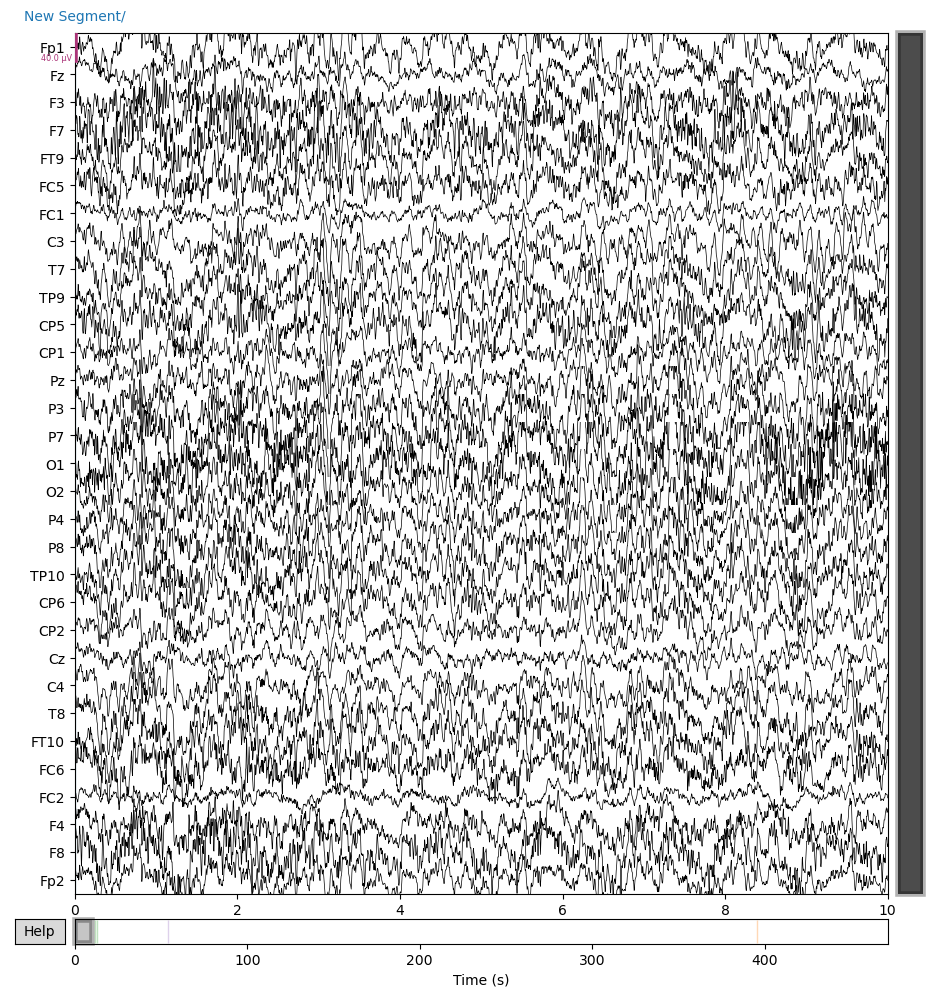

Channels marked as bad:
none


In [17]:
#смотрим на ЭЭГ, с удаленным плохими компонентами 
ica.exclude
#raw_data_to_check=raw_data.copy()
ica.apply(E)
E.plot(start=0, n_channels=len(E.ch_names)) 

In [18]:
#ререференсинг 
E.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<Raw | NP112318_NL_2.fif, 31 x 235730 (471.5 s), ~55.8 MB, data loaded>

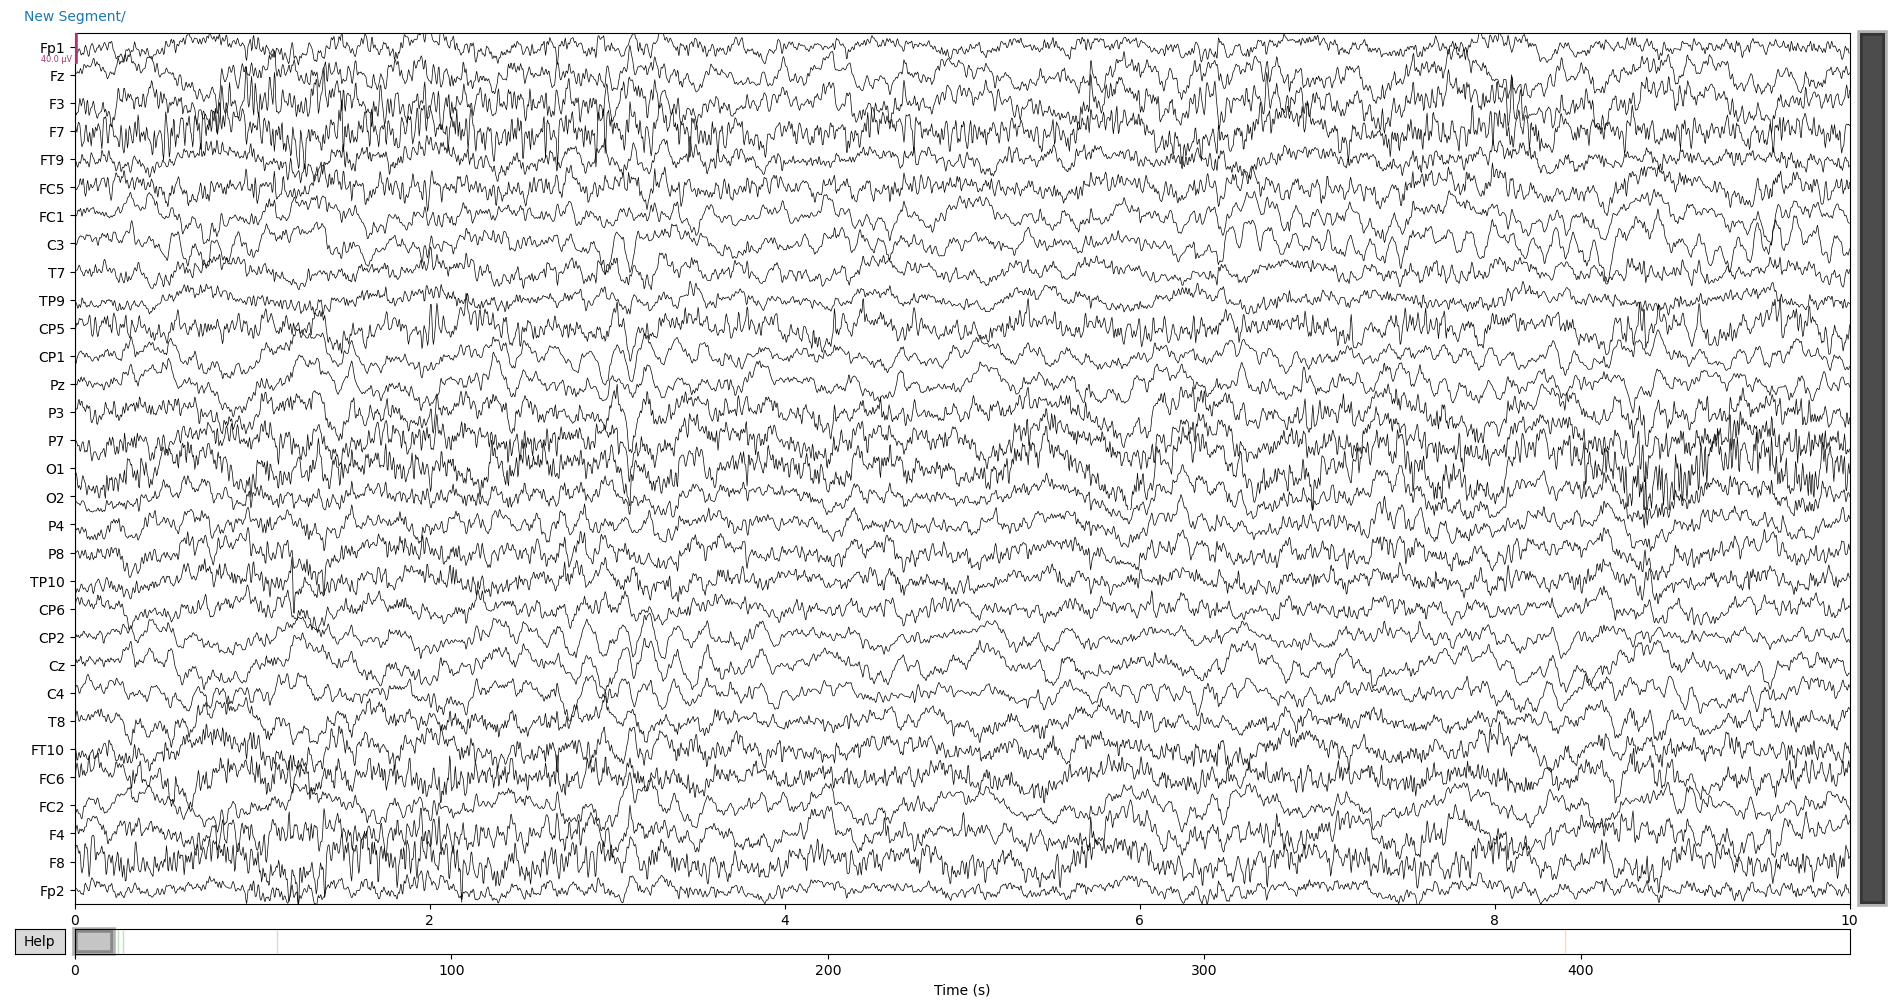

Channels marked as bad:
none


In [19]:
#смортим после ререференсинга 
E.plot(start=0, n_channels=len(E.ch_names)) 

In [20]:
#смотрим метки 
events = mne.events_from_annotations(E) 

Non-RawBrainVision raw using branvision markers
Used Annotations descriptions: ['New Segment/', 'Response/R  1', 'Stimulus/S  1', 'Stimulus/S 12']


In [21]:
events[0]

array([[     0,      0,  99999],
       [  5784,      0,      1],
       [  6327,      0,      1],
       [ 26908,      0,     12],
       [197878,      0,   1001]])

In [22]:
#метки начала интересующего события s1 и s12 
#если меток s1 две подряд, нас интересует вторая
print(events[0][2][0])
print(events[0][3][0])

6327
26908


In [23]:
start_1=events[0][2][0]/500 #метка старта 
fractal_before = E.copy().crop(tmin=start_1, tmax=start_1+30)

start_2=events[0][3][0]/500
fractal_story = E.copy().crop(tmin=start_2, tmax=start_2+30)

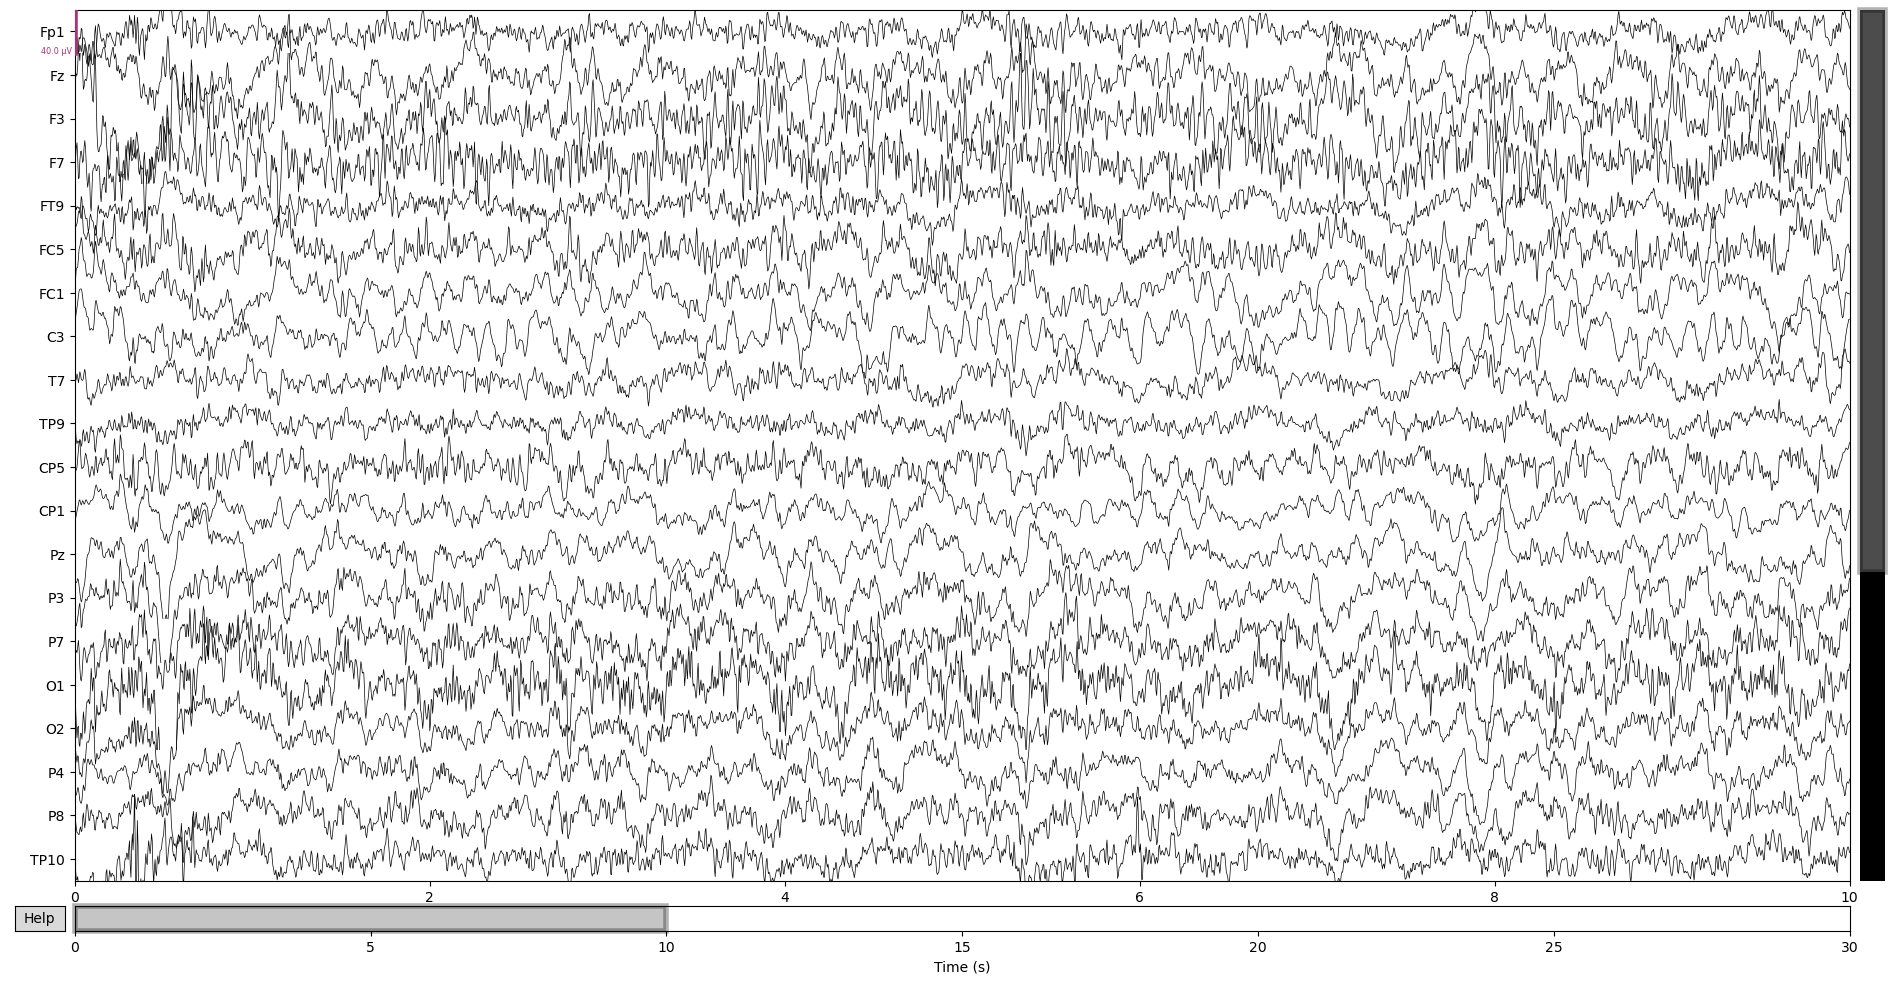

Channels marked as bad:
none


In [25]:
fractal_before.plot()

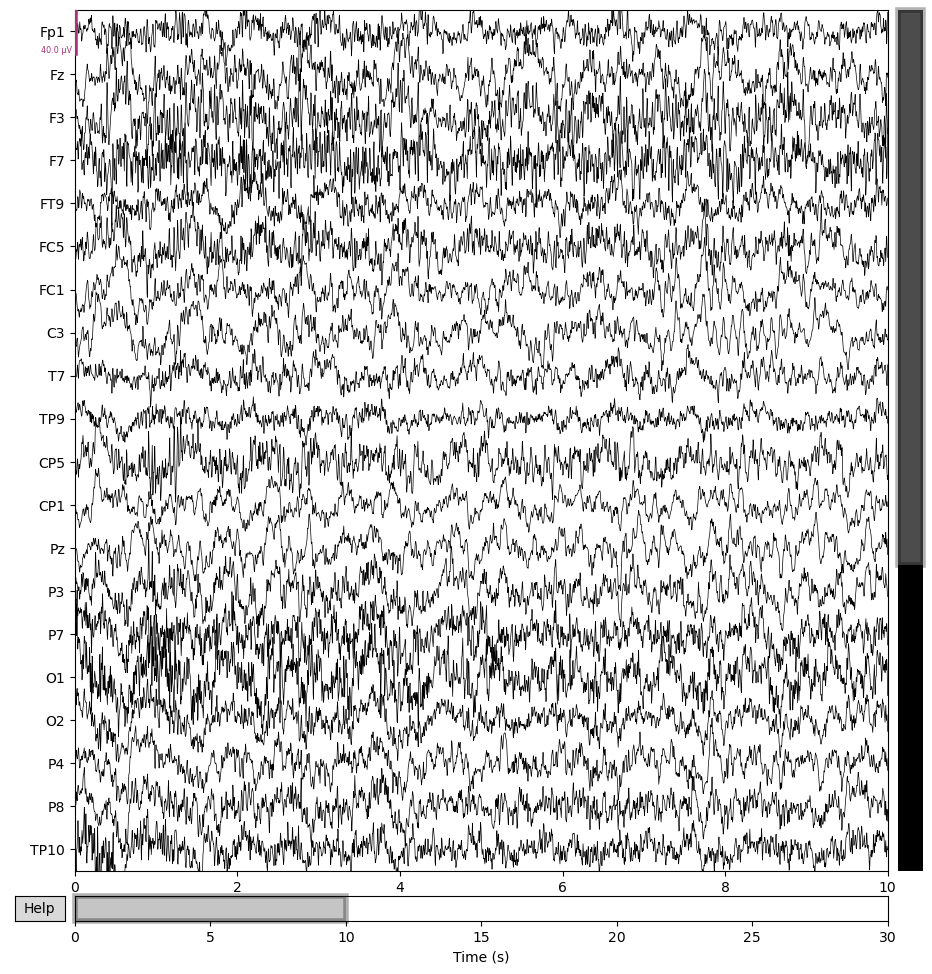

Channels marked as bad:
none


In [26]:
fractal_story.plot()

In [24]:
#удаляем ненужные нам в названии файла символы 
ID_theses = ID.rstrip('.fif')
print(ID_theses)

NP112318_NL_2


In [211]:
#сохраняем записи НЕ ЭПОХИ 
folder = "D:/all_eeg/mu_eeg/chernovik_2/NL_2_3-4_years_preprocecc/" #путь сохарнения 
fractal_before.save(folder + ID_theses + '_fractal_before.fif', overwrite=True)
fractal_story.save(folder + ID_theses + '_fractal_story.fif', overwrite=True)

Writing D:\all_eeg\mu_eeg\chernovik_2\NL_2_3-4_years_preprocecc\NP042306_NL_2_fractal_before.fif
Closing D:\all_eeg\mu_eeg\chernovik_2\NL_2_3-4_years_preprocecc\NP042306_NL_2_fractal_before.fif
[done]
Writing D:\all_eeg\mu_eeg\chernovik_2\NL_2_3-4_years_preprocecc\NP042306_NL_2_fractal_story.fif
Closing D:\all_eeg\mu_eeg\chernovik_2\NL_2_3-4_years_preprocecc\NP042306_NL_2_fractal_story.fif
[done]


C:\Users\chuba\AppData\Local\Temp\ipykernel_14364\4174525999.py:3: RuntimeWarning: This filename (D:\all_eeg\mu_eeg\chernovik_2\NL_2_3-4_years_preprocecc\NP042306_NL_2_fractal_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  fractal_before.save(folder + ID_theses + '_fractal_before.fif', overwrite=True)
C:\Users\chuba\AppData\Local\Temp\ipykernel_14364\4174525999.py:4: RuntimeWarning: This filename (D:\all_eeg\mu_eeg\chernovik_2\NL_2_3-4_years_preprocecc\NP042306_NL_2_fractal_story.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  fractal_story.save(folder + ID_theses + '_fractal_story.fif', overwrite=True)


# ПРИСТУПАЕМ К РАБОТЕ С ЭПОХАМИ 

In [212]:
#формирование эпох по 2 секунды и удаление плохих эпох
threshold = 360e-6 #порого - отткуда велчина? (у Гургена 350e-6)
epochs_fractal_before = mne.make_fixed_length_epochs(fractal_before, duration=2.0, preload=False, reject_by_annotation=True, proj=True, overlap=0.0, id=1, verbose=None)
data_epochs_fractal_before = epochs_fractal_before.drop_bad(reject=dict(eeg=threshold))

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 1000 original time points ...
0 bad epochs dropped


C:\Users\chuba\AppData\Local\Temp\ipykernel_14364\3567757950.py:2: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  data_epochs_fractal_before.plot(n_channels=len(data_epochs_fractal_before))


Using data from preloaded Raw for 15 events and 1000 original time points ...


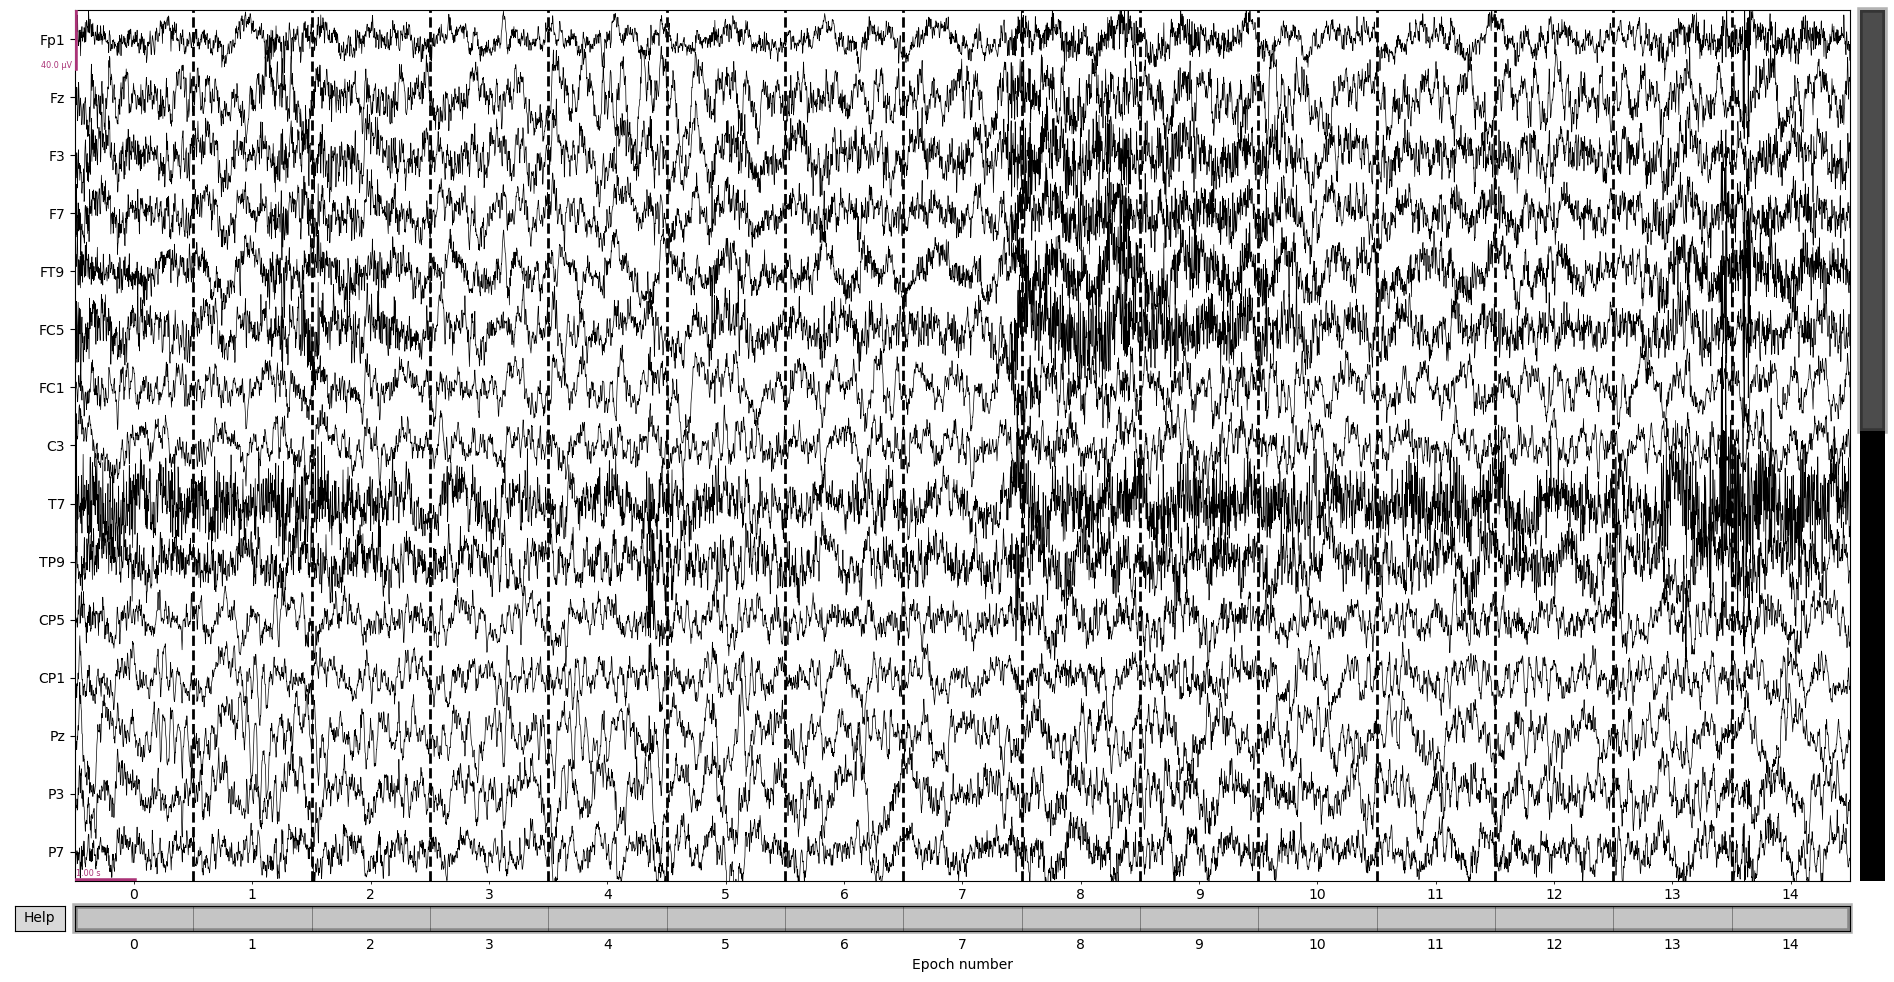

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [213]:
#провереям результат 
data_epochs_fractal_before.plot(n_channels=len(data_epochs_fractal_before))

In [214]:
#сохраняем записи ЭПОХИ 
folder = "D:/all_eeg/mu_eeg/chernovik_2/NL_2_3-4_years_preprocecc/" #путь сохарнения 
data_epochs_fractal_before.save(folder + ID_theses + '_fractal_before_epoch.fif', overwrite=True)


Using data from preloaded Raw for 1 events and 1000 original time points ...
Using data from preloaded Raw for 15 events and 1000 original time points ...


C:\Users\chuba\AppData\Local\Temp\ipykernel_14364\1690352771.py:3: RuntimeWarning: This filename (D:/all_eeg/mu_eeg/chernovik_2/NL_2_3-4_years_preprocecc/NP042306_NL_2_fractal_before_epoch.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data_epochs_fractal_before.save(folder + ID_theses + '_fractal_before_epoch.fif', overwrite=True)


In [215]:
#добавить фракталы с аудио
threshold = 360e-6 
epochs_fractal_story = mne.make_fixed_length_epochs(fractal_story, duration=2.0, preload=False, reject_by_annotation=True, proj=True, overlap=0.0, id=1, verbose=None)
data_epochs_fractal_story = epochs_fractal_story.drop_bad(reject=dict(eeg=threshold))

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 1000 original time points ...
0 bad epochs dropped


C:\Users\chuba\AppData\Local\Temp\ipykernel_14364\4075031519.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  data_epochs_fractal_story.plot(n_channels=len(data_epochs_fractal_story.ch_names))


Using data from preloaded Raw for 15 events and 1000 original time points ...


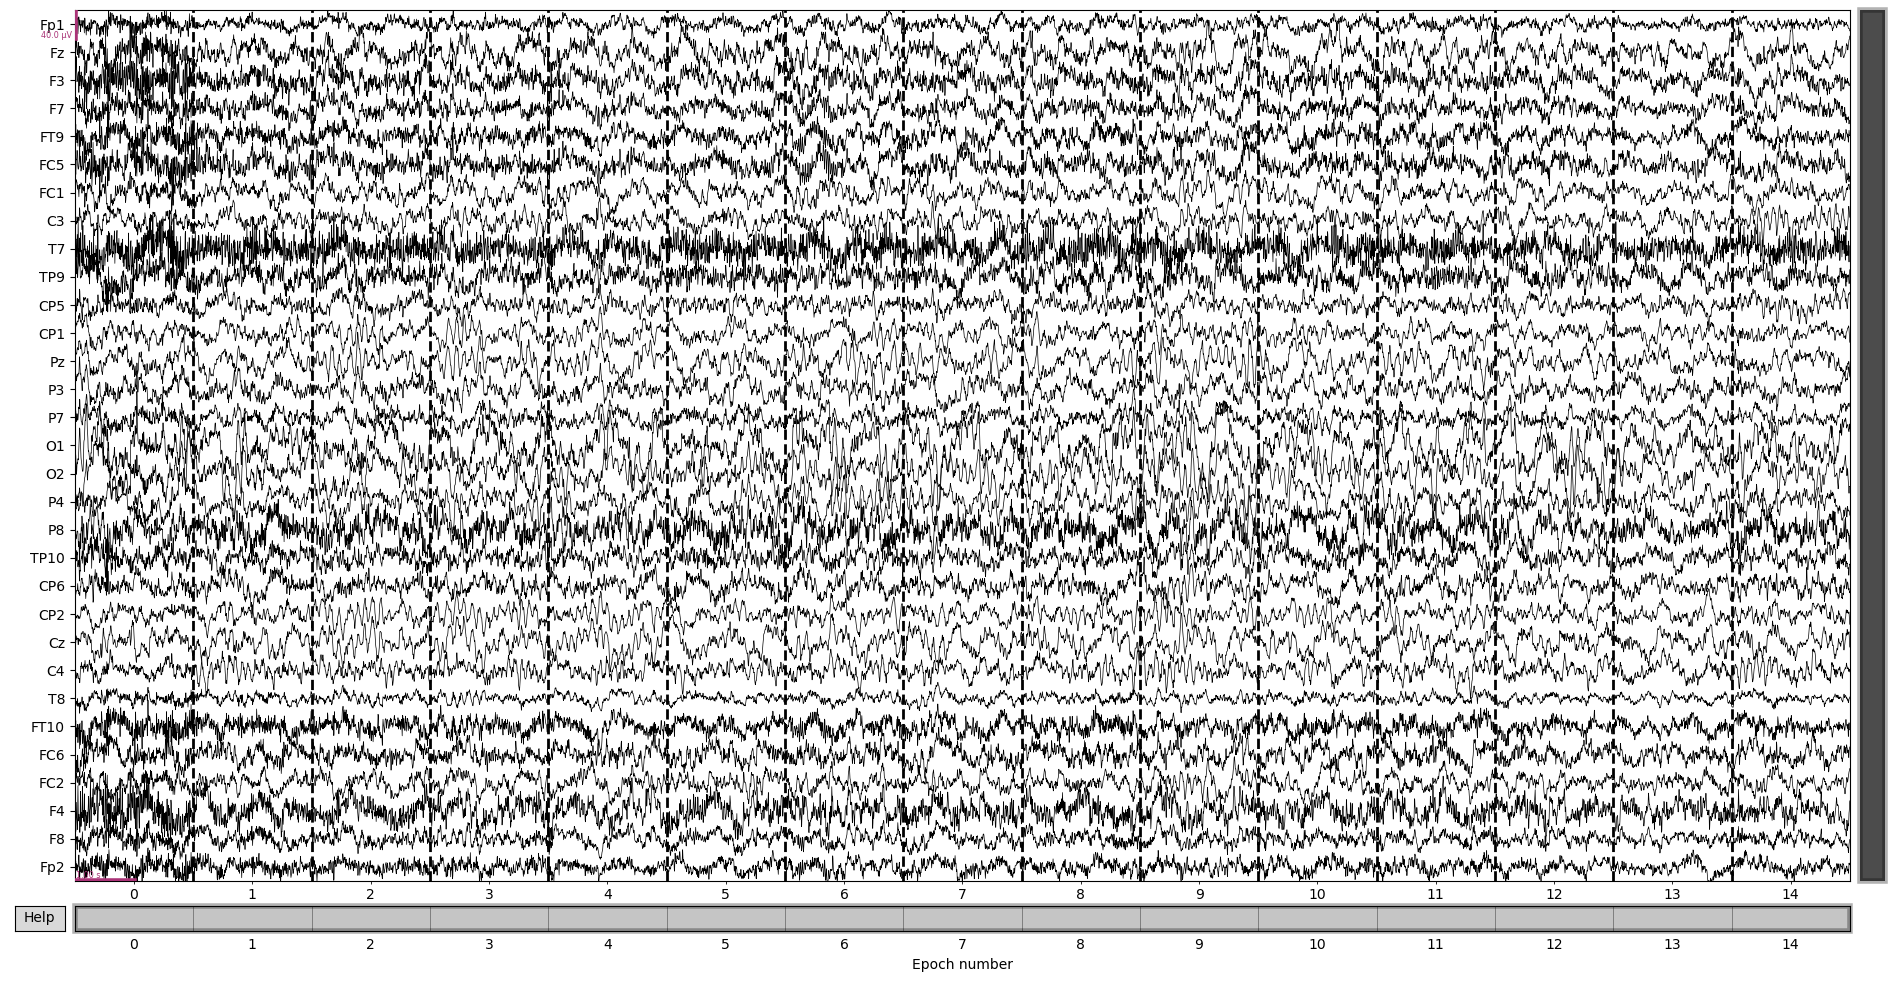

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [216]:
data_epochs_fractal_story.plot(n_channels=len(data_epochs_fractal_story.ch_names))

In [217]:
#сохраняем записи ЭПОХИ 
folder = "D:/all_eeg/mu_eeg/chernovik_2/NL_2_3-4_years_preprocecc/" #путь сохарнения 
data_epochs_fractal_story.save(folder + ID_theses + '_fractal_story_epoch.fif', overwrite=True)

Using data from preloaded Raw for 1 events and 1000 original time points ...
Using data from preloaded Raw for 15 events and 1000 original time points ...


C:\Users\chuba\AppData\Local\Temp\ipykernel_14364\2989978879.py:3: RuntimeWarning: This filename (D:/all_eeg/mu_eeg/chernovik_2/NL_2_3-4_years_preprocecc/NP042306_NL_2_fractal_story_epoch.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data_epochs_fractal_story.save(folder + ID_theses + '_fractal_story_epoch.fif', overwrite=True)
